In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [495]:
Data = pd.read_csv('automobile.csv')

In [496]:
Data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250


In [497]:
Data.shape

(200, 26)

In [498]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       198 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non

In [499]:
Data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,200.000000,164.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,196.000000,196.000000,200.000000,198.000000,198.000000,200.000000,200.000000,200.000000
mean,0.830000,122.000000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,3.330000,3.259847,10.170100,103.358586,5118.181818,25.200000,30.705000,13205.690000
std,1.248557,35.442168,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,0.271303,0.317383,4.014163,37.645120,481.666657,6.432487,6.827227,7966.982558
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,3.150000,3.110000,8.575000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10270.000000
75%,2.000000,150.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.750000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


# CHECK THE DATA FOR MISSING VALUES

In [500]:
Data.isnull().sum()

symboling             0
normalized-losses    36
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

normalized-losses, num-of-doors, bore, stroke, horsepower, peak-rpm have missing values

# HANDLE MISSING VALUES

To handle the missing values in the normalized-losses column, we will make use of the median value as it is more robust to outliers

In [501]:
nl = Data["normalized-losses"].median()

In [502]:
Data["normalized-losses"].replace(np.nan, nl, inplace = True)

To handle the missing values in the num-of-doors column, we will make use of the mode because it is an object

In [503]:
n_o_d = Data["num-of-doors"].mode()[0]

In [504]:
n_o_d

'four'

In [505]:
Data["num-of-doors"].fillna(n_o_d, inplace=True)

In [506]:
Data["num-of-doors"].isnull().sum()

0

To handle missing values in bore column, we will use the KNNImputer

KNNImputer works well with integers so we make use of just the columns that are integers

In [507]:
X_use = []
for x in Data:
    if Data[x].dtype in ["int64", "float64"]:
        X_use.append(x)

In [508]:
X_use

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [509]:
Data[X_use].isnull().sum() #checking for null values in these columns

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [510]:
from sklearn.impute import KNNImputer
X = Data[X_use]

y = Data["bore"]

imputer = KNNImputer(n_neighbors = 10)

X_imputer = imputer.fit_transform(X)

X["bore"] = X_imputer[:, X.columns.get_loc("bore")] #replacing the bore column in the X DataFrame with imputed values

C:\Users\ENEJI\AppData\Local\Temp\ipykernel_32980\2656616448.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["bore"] = X_imputer[:, X.columns.get_loc("bore")] #replacing the bore column in the X DataFrame with imputed values


In [511]:
Data.drop(columns = ["bore"], inplace = True) #dropping the bore column in the original dataframe so we can introduce
                                                #the one without missing values

In [512]:
Data = pd.concat([Data, X["bore"]], axis = 1) #using concat function to join the imputed bore column to Data DataFrame

To handle missing values in the stroke column

We will also make use of KNNImputer

In [513]:
X_use = []
for x in Data:
    if Data[x].dtype in ["int64", "float64"]:
        X_use.append(x)

In [514]:
X = Data[X_use]

y = X["stroke"]

X_impute = KNNImputer(n_neighbors = 10)

X_imputer = X_impute.fit_transform(X)

X["stroke"] = X_imputer[:, X.columns.get_loc("stroke")]

C:\Users\ENEJI\AppData\Local\Temp\ipykernel_32980\2041582339.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["stroke"] = X_imputer[:, X.columns.get_loc("stroke")]


In [515]:
Data.drop(columns = ["stroke"], inplace = True) #dropping the stroke column in the Data DataFrame

In [516]:
Data = pd.concat([Data, X["stroke"]], axis = 1)

In [517]:
Data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,bore,stroke
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,9.0,111.0,5000.0,21,27,16500,3.47,2.68
1,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,9.0,154.0,5000.0,19,26,16500,2.68,3.47
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,10.0,102.0,5500.0,24,30,13950,3.19,3.40
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,8.0,115.0,5500.0,18,22,17450,3.19,3.40
4,2,115.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,8.5,110.0,5500.0,19,25,15250,3.19,3.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,9.5,114.0,5400.0,23,28,16845,3.78,3.15
196,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,8.7,160.0,5300.0,19,25,19045,3.78,3.15
197,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,8.8,134.0,5500.0,18,23,21485,3.58,2.87
198,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,23.0,106.0,4800.0,26,27,22470,3.01,3.40


In [518]:
Data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
bore                 0
stroke               0
dtype: int64

Using Xgboost to predict the missing values in the horsepower column

In [519]:
use = []
for x in Data:
    if Data[x].dtype in ("float64", "int64"):
        use.append(x)

In [520]:
use = Data[use]

In [521]:
from xgboost import XGBRegressor

X_xg = use[~use["horsepower"].isnull()]

X_xg_test = use[use["horsepower"].isnull()]

X_xg_train= X_xg.drop(columns = ["peak-rpm", "horsepower"], inplace = False)

y_xg_test = X_xg["horsepower"]

In [522]:
model = XGBRegressor()

model.fit(X_xg_train, y_xg_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [523]:
X_xg_test.drop(columns = ["peak-rpm", "horsepower"], inplace = True)

C:\Users\ENEJI\AppData\Local\Temp\ipykernel_32980\539501484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_xg_test.drop(columns = ["peak-rpm", "horsepower"], inplace = True)


In [524]:
mh = model.predict(X_xg_test) #making predictions to predict the missing values

In [525]:
mh #predicted values

array([92.09985, 92.25832], dtype=float32)

In [526]:
Data.loc[125,"horsepower"] = mh[0] #replacing the first missing value with the first value

In [527]:
Data.loc[126, "horsepower"] = mh[1] #replacing the second missing value with the second value

Using XGBoost to replace the missing values in the peak-rpm column

In [528]:
use = []
for x in Data:
    if Data[x].dtype in ("float64", "int64"):
        use.append(x)

use = Data[use]

X_xg = use[~use["peak-rpm"].isnull()]

X_xg_test = use[use["peak-rpm"].isnull()]

X_xg_train= X_xg.drop(columns = ["peak-rpm"], inplace = False)

y_xg_test = X_xg["peak-rpm"]

In [529]:
model = XGBRegressor()

In [530]:
model.fit(X_xg_train, y_xg_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [531]:
X_xg_test.drop(columns = ["peak-rpm"], inplace = True)

C:\Users\ENEJI\AppData\Local\Temp\ipykernel_32980\3049876499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_xg_test.drop(columns = ["peak-rpm"], inplace = True)


In [532]:
mp = model.predict(X_xg_test)

In [533]:
mp

array([4956.934 , 5051.3535], dtype=float32)

In [534]:
Data.loc[Data["peak-rpm"].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,bore,stroke
125,0,115.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,8.7,92.099854,NaN,23,31,9295,3.46,3.9
126,2,115.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,8.7,92.258324,NaN,23,31,9895,3.46,3.9


In [535]:
Data.loc[125, "peak-rpm"] = mp[0]

In [536]:
Data.loc[126, "peak-rpm"] = mp[1]

In [537]:
Data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
bore                 0
stroke               0
dtype: int64

# EXPLORATORY DATA ANALYSIS

exploratory data analysis is being done to gain insights and discover patterns in the dataset

Text(0.5, 1.0, 'Number of Doors ratio')

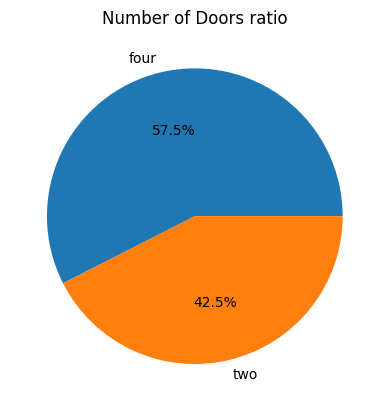

In [538]:
plt.pie(Data["num-of-doors"].value_counts(), labels = ["four", "two"], autopct = "%1.1f%%")
plt.title("Number of Doors ratio")

This indicates that about 57.5 percent of the cars in this dataset have four doors while only about 42.5 percent of the cars have two doors

In [539]:
Data["num-of-doors"].value_counts()

four    115
two      85
Name: num-of-doors, dtype: int64

In [540]:
Data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'bore',
       'stroke'],
      dtype='object')

In [541]:
Which fuel type is more expensive

SyntaxError: invalid syntax (617748963.py, line 1)

<Axes: xlabel='fuel-type', ylabel='price'>

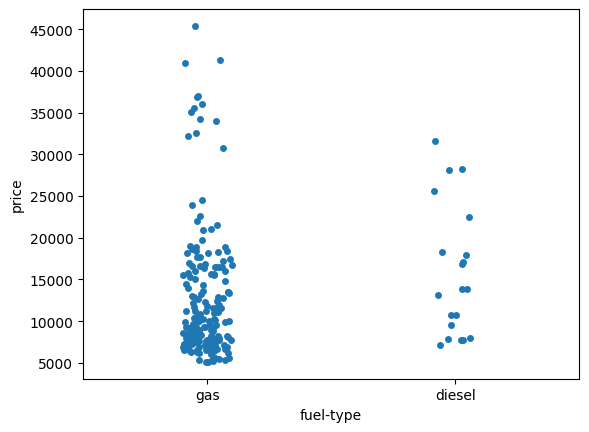

In [542]:
sns.stripplot(data = Data, x = "fuel-type", y = 'price')

In [543]:
Data.groupby("fuel-type").agg({"price" : "mean"})

,price
fuel-type,
diesel,15838.150000
gas,12913.194444


We can see that more cars make use of gas fuel-type, the most expensive cars in our dataset make use of gas fuel-type but on average the cars with diesel fuel-type are more expensive compared to cars using gas fuel-type

<Axes: xlabel='aspiration', ylabel='price'>

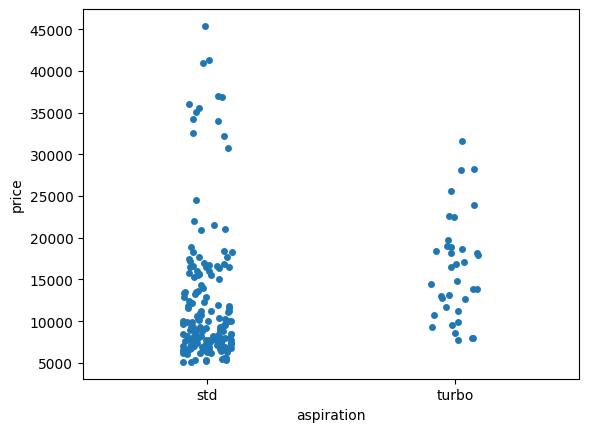

In [544]:
sns.stripplot(data = Data, x = "aspiration", y = "price")

In [545]:
Data.groupby("aspiration").agg({"price" : "mean"})

,price
aspiration,
std,12536.371951
turbo,16254.805556


Same thing with fuel-type, the cars with std aspiration are more than the cars with turbo aspiration and the most expensive cars are those with std aspiration but the cars with turbo aspiration cost more on average

In [546]:
Data.groupby(["num-of-doors", "fuel-type"]).agg({"price" : "mean"})

price
num-of-doors fuel-type              
four         diesel     16100.764706
             gas        13046.540816
two          diesel     14350.000000
             gas        12753.829268

four door cars for diesel and gas fuel-types are on average more expensive than their two door counterparts

<Axes: xlabel='body-style', ylabel='price'>

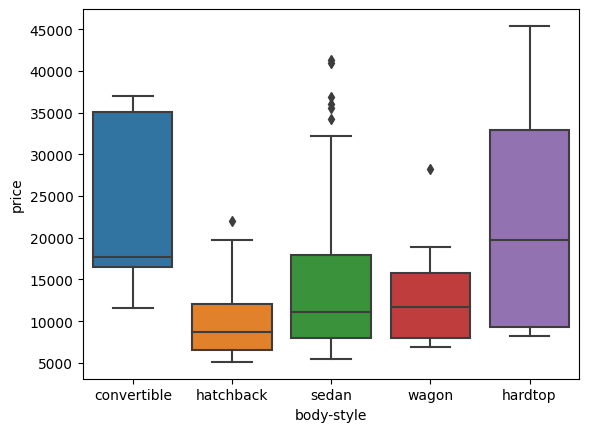

In [547]:
sns.boxplot(data = Data, x = "body-style", y = "price")

- convertible -> The minimum price of the cars with convertible body-style is between 10000 - 15000. However the distribution of the prices of convertible cars is skewed to the right with a maximum value between 35000 to 40000 which is far away from the median price of about 17500. There is no noticeable outlier in the distribution of the prices of the convertible cars. 


- hatchback -> The minimum price of the cars with a hatchback body-style is about 5000. However the distribution of the prices of the cars with hatchback bodystyle is skewed to the right with a maximum value between 20000 - 25000 and a median value value between 5000 - 10000. There is one noticeable outlier


- sedan -> The minimum price of sedan cars is slightly above the 5000 mark. However the distribution of the prices of cars with a sedan body-style is significantly skewed to the right with a maximum value between 40000 - 45000 and a median value slightly above the 10000 mark. There are several outlier prices in this category of cars.


- wagon -> This body is almost symmetrically distributed but minutely skewed to the right. There are two outliers in the prices of wagon cars.


- hardtop -> The distribution of the price of hardtop cars is skewed to the right with a maximum value slightly above the 45000 mark and a minimum just below the 10000 price mark. 


Takeaways - Most expensive car body-style - Hardtop


            Cheapest car body-style - hatchback



Using a stripplot to pinpoint which car type has the best value for money

<Axes: xlabel='body-style', ylabel='price'>

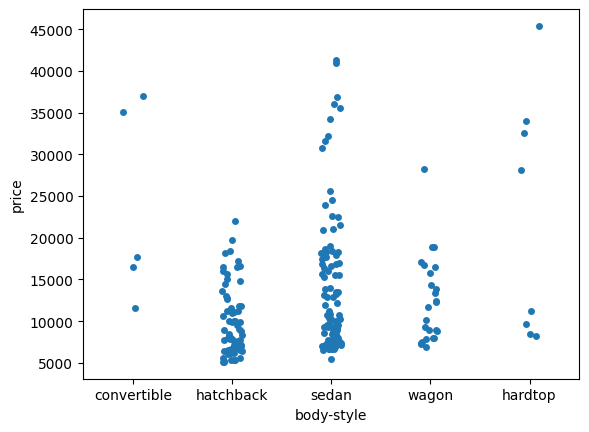

In [548]:
sns.stripplot(data = Data, x = "body-style", y = "price")

Quite hard to indicate which car body-style has the highest value for money as the dataset is quite small.

<Axes: xlabel='engine-location', ylabel='price'>

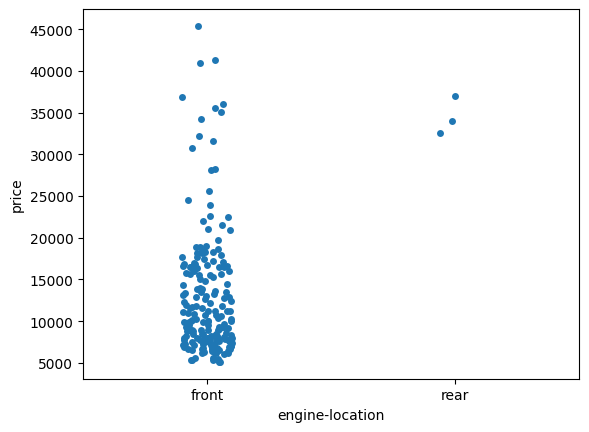

In [549]:
sns.stripplot(data = Data, x = "engine-location", y = "price")

we can see that there is a huge inbalance in the distinct engine-locations in the cars in the dataset

In [550]:
Data["engine-location"].value_counts()

front    197
rear       3
Name: engine-location, dtype: int64

# FEATURE ENGINEERING

In [551]:
Data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'bore',
       'stroke'],
      dtype='object')

Transforming the columns with categorical variables into numerical format for machine learning

In [552]:
categorical = []
for x in Data:
    if Data[x].dtype == ('object'):
        categorical.append(x)

In [553]:
categorical

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [554]:
Data["make"].nunique()

22

Making use of get_dummies function to create new columns from the unique values in the original column

In [555]:
make = pd.get_dummies(Data["make"], prefix = 'make') # Making new columns with the unique values from the original column
                                                        # and setting 1 where present and 0 where absent

In [556]:
Data = pd.concat([Data, make], axis = 1) # joining the new columns back to the original DataFrame

In [559]:
fuel_type = pd.get_dummies(Data["fuel-type"], prefix = "fuel")

In [560]:
Data = pd.concat([Data, fuel_type], axis = 1)

In [573]:
aspiration = pd.get_dummies(Data["aspiration"], prefix = "aspiration")

In [574]:
Data = pd.concat([Data, aspiration], axis = 1)

In [579]:
num_of_doors = pd.get_dummies(Data["num-of-doors"], prefix = "door")

In [580]:
Data = pd.concat([Data, num_of_doors], axis = 1)

In [582]:
body_style = pd.get_dummies(Data["body-style"], prefix = "body-style")
Data = pd.concat([Data, body_style], axis = 1)

In [583]:
drive_wheels = pd.get_dummies(Data["drive-wheels"], prefix = "drive-wheels")
Data = pd.concat([Data, drive_wheels], axis = 1)

In [585]:
engine_location = pd.get_dummies(Data['engine-location'], prefix = 'engine')
Data = pd.concat([Data, engine_location], axis = 1)

In [589]:
engine_type = pd.get_dummies(Data["engine-type"], prefix = "engine-type")
Data = pd.concat([Data, engine_type], axis = 1)

In [590]:
num_of_cylinders = pd.get_dummies(Data["num-of-cylinders"], prefix = "cylinder")
Data = pd.concat([Data, num_of_cylinders], axis = 1)

In [591]:
fuel_system = pd.get_dummies(Data["fuel-system"], prefix = "fuel-system")
Data = pd.concat([Data, fuel_system], axis = 1)

Dropping the original categorical columns

In [593]:
Data.drop(columns = ['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system'], inplace = True)

In [594]:
Data.shape

(200, 75)

Checking the relationship between the columns in the Dataset

In [595]:
Data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,...,cylinder_twelve,cylinder_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
symboling,1.000000,0.462765,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.181073,0.074170,...,-0.047242,0.248910,-0.037509,-0.026852,0.215014,-0.195381,0.123513,0.003789,0.184559,0.066595
normalized-losses,0.462765,1.000000,-0.077168,-0.009513,0.061155,-0.377599,0.065385,0.073660,-0.116261,0.182796,...,-0.012672,0.130181,-0.123726,-0.124969,0.112454,-0.106304,0.053560,0.183140,0.051334,-0.012672
wheel-base,-0.529145,-0.077168,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.249689,0.376887,...,0.037097,-0.084152,-0.196729,-0.401245,-0.072692,0.306706,-0.034696,0.359298,-0.121862,-0.033519
length,-0.364511,-0.009513,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.159203,0.579059,...,0.100563,-0.060640,-0.304517,-0.478216,-0.052382,0.210616,-0.005917,0.510386,-0.083918,-0.009370
width,-0.237262,0.061155,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.189008,0.615860,...,0.158900,-0.013485,-0.199469,-0.520552,-0.011648,0.243448,0.013585,0.456085,-0.046936,-0.023588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fuel-system_idi,-0.195381,-0.106304,0.306706,0.210616,0.243448,0.281198,0.221082,0.070925,0.985228,-0.167627,...,-0.023629,-0.047619,-0.080416,-0.228665,-0.041135,1.000000,-0.023629,-0.304569,-0.072357,-0.023629
fuel-system_mfi,0.123513,0.053560,-0.034696,-0.005917,0.013585,-0.105101,0.034985,0.049720,-0.056123,0.079185,...,-0.005025,-0.010127,-0.017102,-0.048629,-0.008748,-0.023629,1.000000,-0.064771,-0.015388,-0.005025
fuel-system_mpfi,0.003789,0.183140,0.359298,0.510386,0.456085,0.127971,0.510248,0.476765,-0.310866,0.636346,...,0.077583,-0.058810,-0.220431,-0.626799,-0.112755,-0.304569,-0.064771,1.000000,-0.198341,-0.064771
fuel-system_spdi,0.184559,0.051334,-0.121862,-0.083918,-0.046936,-0.289978,-0.002534,0.004795,-0.155595,0.130848,...,-0.015388,-0.031010,-0.052368,-0.148910,-0.026787,-0.072357,-0.015388,-0.198341,1.000000,-0.015388


Making use of XGBoost to predict the price

In [597]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [598]:
model = XGBRegressor()

X = Data.drop(columns = ["price"], inplace = False)

In [ ]:
y = Data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [600]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [602]:
predicted = model.predict(X_test)

In [603]:
mean_absolute_error(predicted, y_test)

1390.6099487304687

The mean absolute error from using xgboost is 1390.6

Using Neural Networks to do the prediction

In [605]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [609]:
n_col = X.shape[1]

In [614]:
model = Sequential()

model.add(Dense(100, activation = 'relu', input_shape = (n_col,)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_absolute_error')

early_stopping = EarlyStopping(patience = 3, monitor = 'val_loss')

model.fit(X_train, y_train, validation_data = (X_test, y_test), callbacks = [early_stopping], epochs = 15)

Epoch 1/15
5/5 [==============================] - 1s 65ms/step - loss: 12230.3506 - val_loss: 13670.8965
Epoch 2/15
5/5 [==============================] - 0s 15ms/step - loss: 11213.7822 - val_loss: 12567.8213
Epoch 3/15
5/5 [==============================] - 0s 16ms/step - loss: 9962.9424 - val_loss: 11097.9473
Epoch 4/15
5/5 [==============================] - 0s 15ms/step - loss: 8248.5947 - val_loss: 9073.5732
Epoch 5/15
5/5 [==============================] - 0s 13ms/step - loss: 6112.7524 - val_loss: 6858.1182
Epoch 6/15
5/5 [==============================] - 0s 12ms/step - loss: 4958.5107 - val_loss: 6598.6826
Epoch 7/15
5/5 [==============================] - 0s 13ms/step - loss: 4757.1572 - val_loss: 6954.0781
Epoch 8/15
5/5 [==============================] - 0s 12ms/step - loss: 4978.5342 - val_loss: 6908.2627
Epoch 9/15
5/5 [==============================] - 0s 13ms/step - loss: 4762.3267 - val_loss: 6524.9868
Epoch 10/15
5/5 [==============================] - 0s 14ms/step - lo

The lowest mean absolute error gotten from using neural networks to make prediction is 6087.96 which is still much higher than the the mean absolute error gotten when xgboost was used to make prediction (1390.6)

Indicating that in this case the XGBoost model was better than the neural networks in predicting the automobile price